In [25]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [107]:
def load_npy(path):
    ary = np.load(path)
    ary.shape = (1, 1, *ary.shape)
    # Convert to tenso
#     img = torch.from_numpy(ary).float()
    return ary

def load_jpg(path):
    ary = cv2.imread(path)
    ary.shape = (1, 1, *ary.shape)
    # Convert to tenso
#     img = torch.from_numpy(ary).float()
    return ary

In [127]:
folder_path = "/home/jonas/Documents/master_thesis/thesis_full/figures/segmentation_datasets/BUSI/"
img_name = "benign_346.png"
mask_name = "benign_346_mask_full.png"

# im = load_npy(folder_path + img_name)
# mk = load_npy(folder_path + mask_name)

im = load_jpg(folder_path + img_name)
mk = load_jpg(folder_path + mask_name)

In [140]:
print(im.shape)
print(mk.shape)

(373, 610, 3)
(373, 610, 1)


In [129]:
im.shape = (im.shape[2], im.shape[3], 3)
mk.shape = (mk.shape[2], mk.shape[3], 3)

In [133]:
print(im.shape)
print(mk.shape)

(373, 610, 3)
(373, 610)


In [132]:
mk.max()

255

In [131]:
mk = mk[:,:,0]

In [134]:
mk.shape = (mk.shape[0], mk.shape[1], 1)

In [141]:
# uint_im = np.array(im).astype('uint8')
# gray_im = cv2.cvtColor(uint_im, cv2.COLOR_GRAY2BGR) 

# OR

gray_im = im

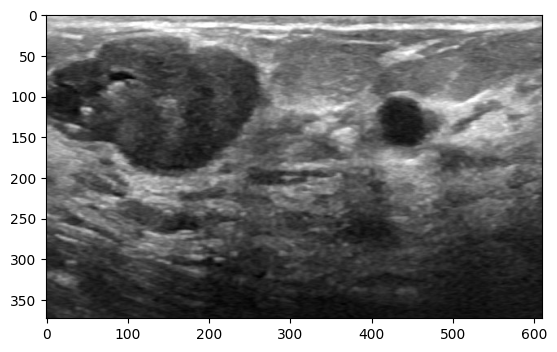

In [136]:
plt.imshow(im)
# plt.imshow(mk)

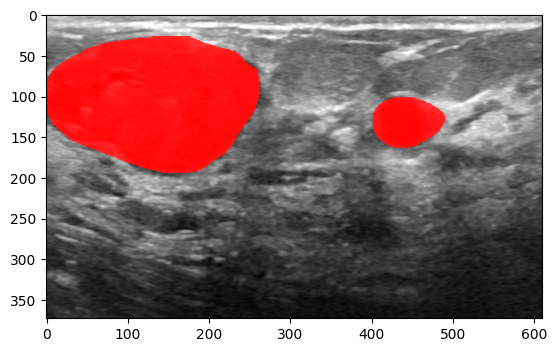

In [142]:
newim = im.copy()
for i in range(mk.shape[0]):
    for j in range(mk.shape[1]):
#         print(mk[i][j])
        if mk[i][j] == 255:
            newim[i][j][0] = 255
            newim[i][j][1] = int(gray_im[i][j][1] * 0.25)
            newim[i][j][2] = int(gray_im[i][j][2] * 0.25)

plt.imshow(newim)